In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

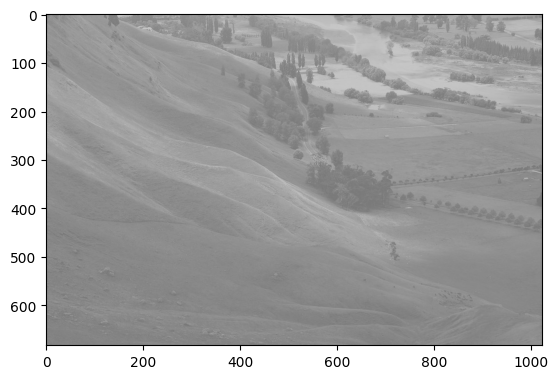

In [2]:
img = cv2.imread('low_contrast_wikipedia.jpg', 0)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [3]:
img

array([[127, 145, 149, ..., 168, 167, 166],
       [165, 152, 143, ..., 168, 169, 168],
       [171, 145, 140, ..., 156, 154, 151],
       ...,
       [147, 132, 134, ..., 146, 145, 144],
       [146, 130, 132, ..., 146, 145, 144],
       [145, 128, 129, ..., 146, 145, 144]],
      shape=(683, 1024), dtype=uint8)

In [4]:
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

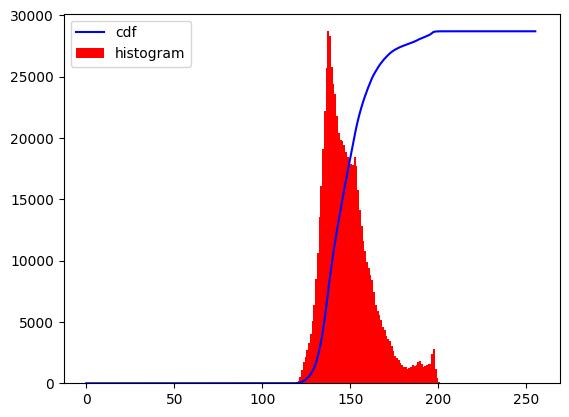

In [5]:
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, range=[0, 256], color='r')
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

stretch CDF

In [6]:
# mask zeros to not mess up contrast calculation
cdf = np.ma.masked_equal(cdf, 0)

cdf = (cdf - cdf.min()) * 255 / (cdf.max()-cdf.min())

# fill in masked zeros
cdf = np.ma.filled(cdf, 0).astype('uint8')

cdf

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   2,   3,   4,   5,   7,   9,
        13,  16,  21,  27,  34,  42,  52,  62,  72,  82,  91,  99, 107,
       115, 122, 129, 136, 143, 150, 156, 163, 169, 176, 183, 188, 194,
       198, 202, 206, 210, 213, 217, 220, 222, 225, 227, 229, 231, 232,
       234, 235, 237, 238, 239, 240, 241, 242, 242, 243, 243, 24

replace original intensity values with contrast-stretched ones

In [7]:
img_stretched = cdf[img]
img_stretched

array([[  5, 129, 156, ..., 232, 231, 229],
       [227, 176, 115, ..., 232, 234, 232],
       [237, 129,  91, ..., 198, 188, 169],
       ...,
       [143,  21,  34, ..., 136, 129, 122],
       [136,  13,  21, ..., 136, 129, 122],
       [129,   7,   9, ..., 136, 129, 122]],
      shape=(683, 1024), dtype=uint8)

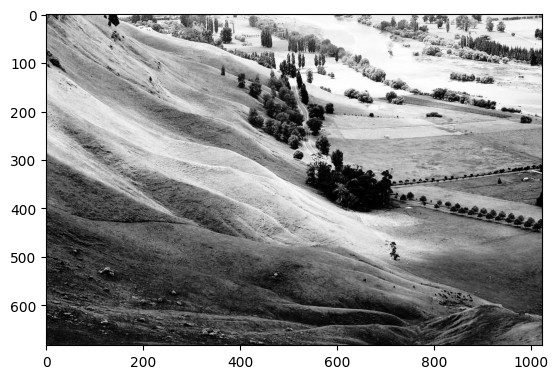

In [8]:
plt.imshow(img_stretched, cmap='gray', vmin=0, vmax=255)

or just use the OpenCV functionality :)

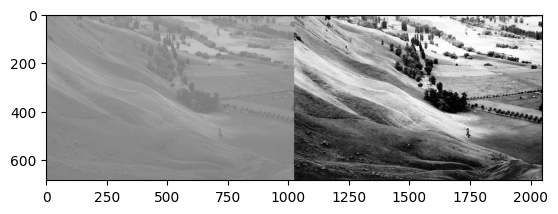

In [9]:
img_equalized = cv2.equalizeHist(img)

#stacking images side-by-side
plt.imshow(np.hstack((img, img_equalized)), cmap='gray', vmin=0, vmax=255)